In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import * 
import requests_html

from tqdm import tqdm_notebook
from datetime import *

import talib as ta

import warnings
warnings.filterwarnings('ignore')

print('\n          * * * NO ISSUES - ALL IMPORTS LOADED * * * \n')

%load_ext autotime


          * * * NO ISSUES - ALL IMPORTS LOADED * * * 

time: 1.55 ms


In [2]:
stock = '^GSPC'

data = yf.download(stock, period = '10y', interval = '1d', parse_dates = True, index_col=0)
data.to_csv('/home/gordon/work/project_models/build/test/data/sp500_10y_1d.csv')
# /home/gordon/work/project_models/test
# /home/gordon/work/project_models/build/test
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-14,1241.839966,1246.589966,1238.170044,1241.589966,1241.589966,4132350000
2010-12-15,1241.579956,1244.250000,1234.010010,1235.229980,1235.229980,4407340000
2010-12-16,1236.339966,1243.750000,1232.849976,1242.869995,1242.869995,4736820000
2010-12-17,1243.630005,1245.810059,1239.869995,1243.910034,1243.910034,4632470000
2010-12-20,1245.760010,1250.199951,1241.510010,1247.079956,1247.079956,3548140000


time: 558 ms


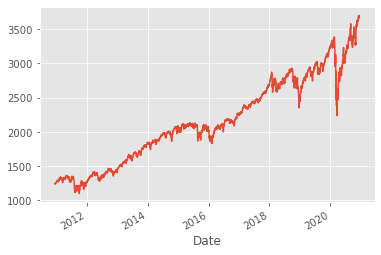

time: 266 ms


In [3]:
data['Adj Close'].plot();

In [4]:
prices = data['Adj Close']
volumes = data['Volume']

time: 1.22 ms


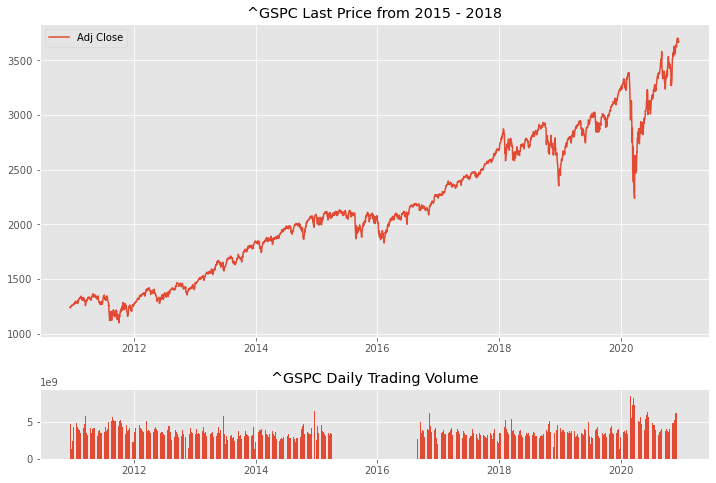

time: 7.45 s


In [5]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Adj Close')
plt.title(f'{stock} Last Price from 2015 - 2018')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title(f'{stock} Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75);

In [6]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline


df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Adj Close']]

figure, ax = plt.subplots(figsize = (8,4), dpi = 100)
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(
    ax,
    df_ohlc.values,
    width=0.8,
    colorup='green',
    colordown='red'
);

NameError: name 'df_subset' is not defined

# plot returns

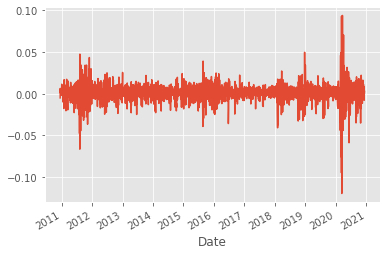

time: 463 ms


In [10]:
daily_changes = data['Adj Close'].pct_change(periods=1)
daily_changes.plot(); 

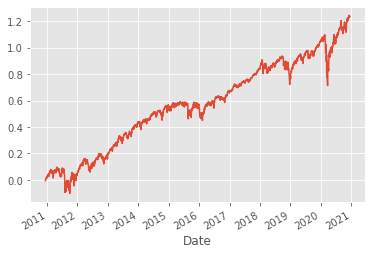

time: 389 ms


In [11]:
# cumulative 
 
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

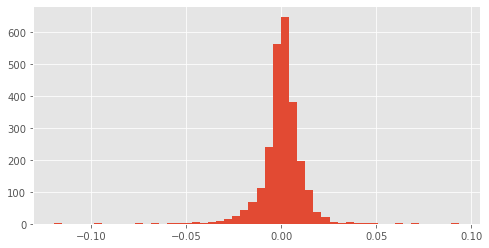

time: 556 ms


In [12]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [13]:
daily_changes.describe()

count    2517.000000
mean        0.000492
std         0.010985
min        -0.119841
25%        -0.003363
50%         0.000648
75%         0.005277
max         0.093828
Name: Adj Close, dtype: float64

time: 8.15 ms


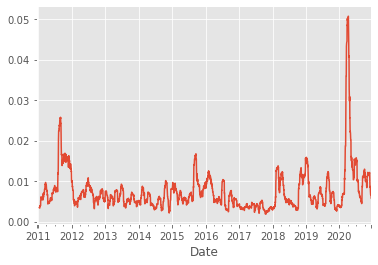

time: 534 ms


In [14]:
# volatility

df_filled = data['Adj Close'].asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

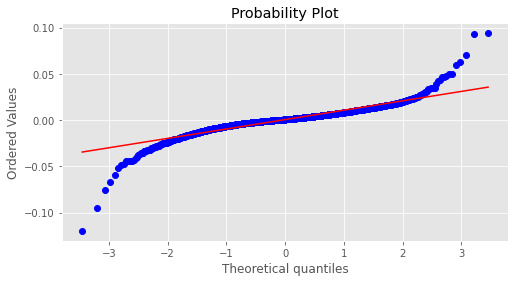

time: 426 ms


In [15]:
# PROBABILITY PLOT:

daily_changes = data.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8,4))

ax = figure.add_subplot(111)
stats.probplot(daily_changes['Adj Close'], dist='norm', plot=ax)
plt.show();

In [16]:
stocks = ['TSLA','AAPL','AMZN','GOOGL']
df = yf.download(stocks, period = '2y', interval = '1d')['Adj Close']
df.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,TSLA
Date,,,,
2018-12-14,40.080482,1591.910034,1051.709961,73.141998
2018-12-17,39.707485,1520.910034,1025.650024,69.683998
2018-12-18,40.223396,1551.479980,1043.410034,67.405998
2018-12-19,38.968761,1495.079956,1035.459961,66.594002
2018-12-20,37.985397,1460.829956,1023.580017,63.076000


time: 536 ms


In [17]:
df.pct_change().corr()

,AAPL,AMZN,GOOGL,TSLA
AAPL,1.000000,0.684491,0.711444,0.458128
AMZN,0.684491,1.000000,0.672200,0.433724
GOOGL,0.711444,0.672200,1.000000,0.406668
TSLA,0.458128,0.433724,0.406668,1.000000


time: 10.4 ms


In [18]:
df.cov()

,AAPL,AMZN,GOOGL,TSLA
AAPL,709.399179,14667.987378,4792.640986,3749.716253
AMZN,14667.987378,341383.781412,95421.766722,81610.371244
GOOGL,4792.640986,95421.766722,37146.136281,25357.958768
TSLA,3749.716253,81610.371244,25357.958768,22593.550257


time: 17.6 ms


# MOVING AVERAGES - SIMPLE & EXPONENTIAL

SIMPLE MOVING AVERAGE


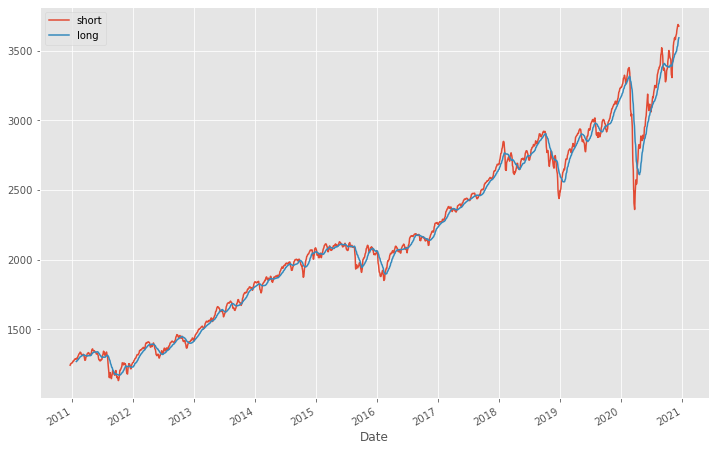

time: 460 ms


In [19]:
print('SIMPLE MOVING AVERAGE')

df_filled = data.asfreq('D', method='ffill')
df_last = data['Adj Close']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

EXPONENTIAL MOVING AVERAGE


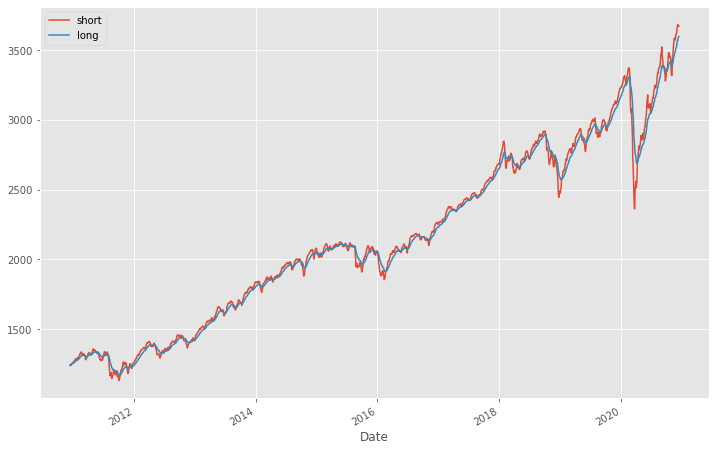

time: 410 ms


In [20]:
print('EXPONENTIAL MOVING AVERAGE')

df_filled = df.asfreq('D', method='ffill')
df_last = data['Adj Close']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

# The capital asset pricing model and the security market line

In [21]:
""" 
Linear regression with SciPy 
"""
from scipy import stats

stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_value, p_value, std_err = \
    stats.linregress(stock_returns, mkt_returns)

' \nLinear regression with SciPy \n'

time: 5.25 ms


In [22]:
print(beta, alpha)

0.5077431878770808 -0.008481900352462384
time: 1.57 ms


In [23]:
""" 
Least squares regression with statsmodels 
"""
import numpy as np
import statsmodels.api as sm

# Generate some sample data
num_periods = 9
all_values = np.array([np.random.random(8) \
                       for i in range(num_periods)])

# Filter the data
y_values = all_values[:, 0] # First column values as Y
x_values = all_values[:, 1:] # All other values as X
x_values = sm.add_constant(x_values) # Include the intercept
results = sm.OLS(y_values, x_values).fit() # Regress and fit the model

print(results.summary())

' \nLeast squares regression with statsmodels \n'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2.509
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.452
Time:                        09:32:36   Log-Likelihood:                 10.860
No. Observations:                   9   AIC:                            -5.720
Df Residuals:                       1   BIC:                            -4.143
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9046      8.690     -1.485      0.3

In [24]:
print(results.params)

[-12.90459583  -6.04051144   3.04465126  -3.32139173   2.54666288
  12.71523434  -8.51310335  21.40622039]
time: 2.45 ms


# Linear optimization

In [25]:
""" 
A linear optimization problem with 2 variables
"""
import pulp

x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

problem = pulp.LpProblem(
    'A simple maximization objective', 
    pulp.LpMaximize)
problem += 3*x + 2*y, 'The objective function'
problem += 2*x + y <= 100, '1st constraint'
problem += x + y <= 80, '2nd constraint'
problem += x <= 40, '3rd constraint'
problem.solve()

' \nA linear optimization problem with 2 variables\n'

1

time: 98.8 ms


In [26]:
print("Maximization Results:")
for variable in problem.variables():
    print(variable.name, '=', variable.varValue)

Maximization Results:
x = 20.0
y = 60.0
time: 1.97 ms


In [27]:
""" 
An example of implementing an integer 
programming model with binary conditions 
"""
import pulp

dealers = ['X', 'Y', 'Z']
variable_costs = {'X': 500, 'Y': 350, 'Z': 450}
fixed_costs = {'X': 4000, 'Y': 2000, 'Z': 6000}

# Define PuLP variables to solve
quantities = pulp.LpVariable.dicts('quantity', 
                                   dealers, 
                                   lowBound=0,
                                   cat=pulp.LpInteger)
is_orders = pulp.LpVariable.dicts('orders', 
                                  dealers,
                                  cat=pulp.LpBinary)

' \nAn example of implementing an integer \nprogramming model with binary conditions \n'

time: 7.19 ms


In [28]:
"""
This is an example of implementing an 
IP model with binary variables the correct way.
"""
# Initialize the model with constraints
model = pulp.LpProblem('A cost minimization problem',
                       pulp.LpMinimize)
model += sum(
    [variable_costs[i]*quantities[i] + \
         fixed_costs[i]*is_orders[i] for i in dealers])\
    , 'Minimize portfolio cost'
model += sum([quantities[i] for i in dealers]) == 150\
    ,  'Total contracts required'
model += is_orders['X']*30 <= quantities['X'] <= \
    is_orders['X']*100, 'Boundary of total volume of X'
model += is_orders['Y']*30 <= quantities['Y'] <= \
    is_orders['Y']*90, 'Boundary of total volume of Y'
model += is_orders['Z']*30 <= quantities['Z'] <= \
    is_orders['Z']*70, 'Boundary of total volume of Z'
model.solve()

'\nThis is an example of implementing an \nIP model with binary variables the correct way.\n'

1

time: 47.4 ms


In [29]:
print('Minimization Results:')
for variable in model.variables():
    print(variable, '=', variable.varValue)

print('Total cost:',  pulp.value(model.objective))

Minimization Results:
orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0
Total cost: 66500.0
time: 4.95 ms


# statistical analysis of TS

### download components:

In [30]:
stock = tickers_sp500()
stock[61], stock[71] = 'BF-B','BRK-B'


df_components = yf.download(stock, start = '2017-01-03', end = '2019-12-30', interval = '1d', parse_dates = True, index_col=0)['Adj Close']
# df_components = df_components.iloc[1:-1]
df_components.head()

[*********************100%***********************]  505 of 505 completed

4 Failed downloads:
- OTIS: Data doesn't exist for startDate = 1483426800, endDate = 1577689200
- VNT: Data doesn't exist for startDate = 1483426800, endDate = 1577689200
- CARR: Data doesn't exist for startDate = 1483426800, endDate = 1577689200
- LUMN: No data found for this date range, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.974556,44.741226,168.355179,27.277639,51.220478,76.909164,112.360001,36.294086,108.988495,103.480003,66.756104,40.647903,94.856934,76.180000,46.824547,...,82.408440,19.068991,26.197357,81.032707,36.374241,55.070808,74.296684,56.888531,23.787016,47.210743,58.928459,100.255760,86.250000,39.293274,52.256729
2017-01-04,45.564671,45.127758,169.736740,27.247108,51.942707,78.817696,115.739998,36.582207,109.250534,104.139999,66.618004,40.577499,95.003586,77.519997,46.878178,...,83.614113,19.450897,26.430338,83.645470,36.535435,54.669926,73.479240,57.354347,24.684637,47.914391,59.142868,101.177498,87.029999,39.857468,52.763794
2017-01-05,45.022934,44.345032,169.618347,27.385668,52.336643,77.905327,114.809998,36.898209,107.612801,105.910004,65.660538,40.278290,94.435333,76.930000,47.110600,...,83.349442,19.364098,26.706463,84.720230,36.535435,54.007980,72.383888,56.607086,24.581066,47.476990,59.338650,101.827568,84.750000,39.211372,52.588257
2017-01-06,46.425671,44.654255,167.397919,27.690971,52.353065,78.948051,115.419998,37.901989,108.838760,108.300003,65.918312,39.354282,94.499512,79.300003,47.468178,...,84.917824,19.589764,26.620176,85.637459,36.642887,55.052166,72.343018,56.568279,24.201303,47.144192,60.056496,101.837265,85.959999,39.466175,52.754028
2017-01-09,46.570778,45.494972,167.299271,27.944603,52.697758,79.581116,117.110001,37.864819,107.622154,108.570000,66.231346,39.380680,93.912949,79.589996,46.475903,...,85.123672,19.572407,26.723721,85.933945,36.087696,55.061493,71.149574,56.742973,24.063204,46.944500,60.224304,103.816566,85.970001,39.038479,52.607777


time: 40.4 s


In [31]:
filled_df_components = df_components.fillna(method='ffill')
daily_df_components = filled_df_components.resample('24h').ffill()
daily_df_components = daily_df_components.fillna(method='bfill')
daily_df_components = daily_df_components.fillna(0)

time: 15.6 ms


In [32]:
stock = '^GSPC'

df = yf.download(stock, period = '10y', interval = '1d', parse_dates = True, index_col=0)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-14,1241.839966,1246.589966,1238.170044,1241.589966,1241.589966,4132350000
2010-12-15,1241.579956,1244.250000,1234.010010,1235.229980,1235.229980,4407340000
2010-12-16,1236.339966,1243.750000,1232.849976,1242.869995,1242.869995,4736820000
2010-12-17,1243.630005,1245.810059,1239.869995,1243.910034,1243.910034,4632470000
2010-12-20,1245.760010,1250.199951,1241.510010,1247.079956,1247.079956,3548140000


time: 592 ms


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-12-14 to 2020-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB
time: 7.43 ms


In [34]:
df.index

DatetimeIndex(['2010-12-14', '2010-12-15', '2010-12-16', '2010-12-17',
               '2010-12-20', '2010-12-21', '2010-12-22', '2010-12-23',
               '2010-12-27', '2010-12-28',
               ...
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

time: 3.14 ms


In [35]:
import pandas as pd

# Prepare the dataframe
df_sp = pd.DataFrame(df['Adj Close'])
df_sp.columns = ['SP500']
df_sp.index = pd.to_datetime(df_sp.index)

# Trim the new dataframe and resample
sp_2017 = pd.DataFrame(df_sp.loc['2017-01-03':'2019-12-30'])
sp_2017 = sp_2017.resample('24h').ffill()

time: 15.6 ms


# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [36]:
df_z_components = daily_df_components.apply(lambda x: (x - x.mean()) / x.std())

time: 381 ms


In [37]:
df_z_components = df_z_components.fillna(0)

time: 4.47 ms


In [38]:
np.any(np.isnan(df_z_components))

False

time: 8.93 ms


In [39]:
np.all(np.isfinite(df_z_components))

True

time: 6.34 ms


In [40]:
from sklearn.decomposition import KernelPCA

fitted_pca = KernelPCA()
fitted_pca.fit(df_z_components)

KernelPCA()

time: 173 ms


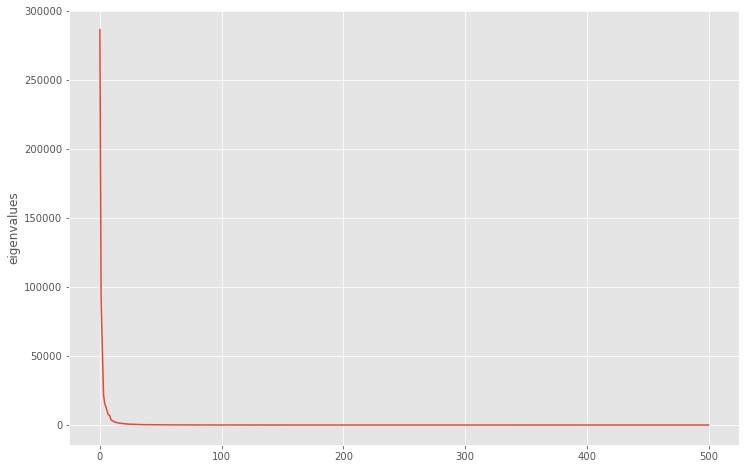

time: 258 ms


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fitted_pca.lambdas_)
plt.ylabel('eigenvalues')
plt.show();

In [76]:
# print(fitted_pca.lambdas_[1:])
fitted_pca.lambdas_

array([2.86362555e+05, 9.07110248e+04, 5.59196250e+04, 2.20682276e+04,
       1.53374356e+04, 1.31025579e+04, 9.77844926e+03, 7.30512959e+03,
       6.99051828e+03, 4.09408291e+03, 3.16911490e+03, 2.88578346e+03,
       2.18108294e+03, 2.03807518e+03, 1.69702279e+03, 1.63384010e+03,
       1.35713584e+03, 1.29852153e+03, 1.14468511e+03, 1.08351861e+03,
       9.43702443e+02, 8.60204662e+02, 8.30113640e+02, 7.66144145e+02,
       6.50655457e+02, 6.11164855e+02, 5.13573932e+02, 4.94827239e+02,
       4.67862389e+02, 4.30689813e+02, 4.13139780e+02, 3.90001381e+02,
       3.64010876e+02, 3.41183197e+02, 3.20619674e+02, 2.90475283e+02,
       2.80211706e+02, 2.75962442e+02, 2.51386784e+02, 2.42272359e+02,
       2.26103216e+02, 2.15792431e+02, 2.08239373e+02, 1.96609200e+02,
       1.80282216e+02, 1.71141430e+02, 1.58367296e+02, 1.55886842e+02,
       1.51884346e+02, 1.38220750e+02, 1.36446056e+02, 1.28528859e+02,
       1.20704703e+02, 1.16474622e+02, 1.10787963e+02, 1.07400379e+02,
      

time: 9.09 ms


In [93]:
fn_weighted_avg = lambda x: x / x.sum()
weighted_values = fn_weighted_avg(fitted_pca.lambdas_)[:13]

time: 2.01 ms


In [94]:
print(weighted_values)

[0.52390646 0.16595777 0.10230616 0.0403743  0.02806017 0.02397141
 0.01788988 0.01336489 0.0127893  0.00749021 0.00579796 0.0052796
 0.00399034]
time: 1.5 ms


In [95]:
weighted_values.sum()

0.9511784632355411

time: 3.13 ms


## Reconstructing the Dow Index with PCA

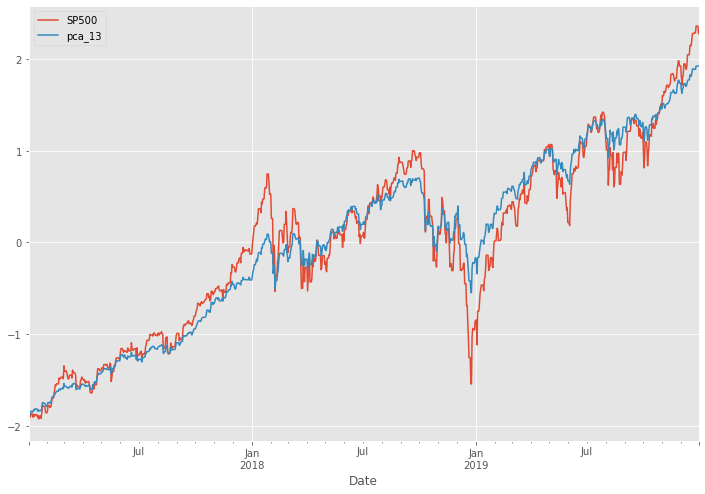

time: 745 ms


In [97]:
import numpy as np

daily_df_components = daily_df_components.fillna(0)

fn_z_score = lambda x: (x - x.mean()) / x.std()

kernel_pca = KernelPCA(n_components = 13).fit(df_z_components)
pca_13 = kernel_pca.transform(daily_df_components)

weights = fn_weighted_avg(kernel_pca.lambdas_)
reconstructed_values = np.dot(pca_13, weights)

# Combine DJIA and PCA index for comparison
df_combined = sp_2017.copy()
df_combined['pca_13'] = reconstructed_values
df_combined = df_combined.apply(fn_z_score)
df_combined.plot(figsize=(12, 8))
plt.legend();

In [98]:
df_settle = df['Adj Close'].resample('MS').ffill().dropna()

df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

time: 5.81 ms


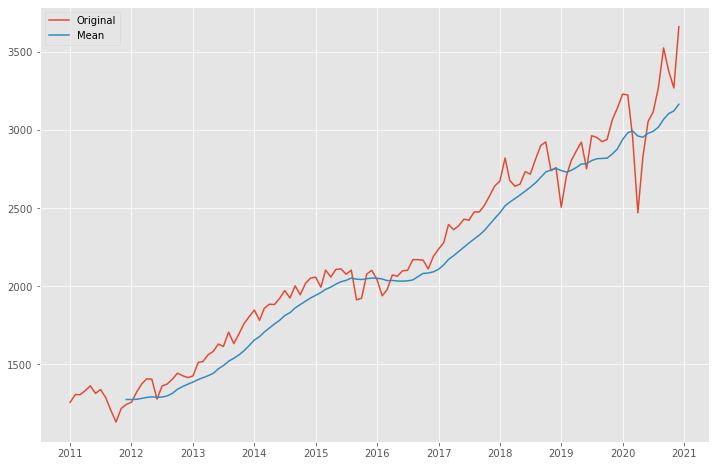

time: 350 ms


In [99]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();

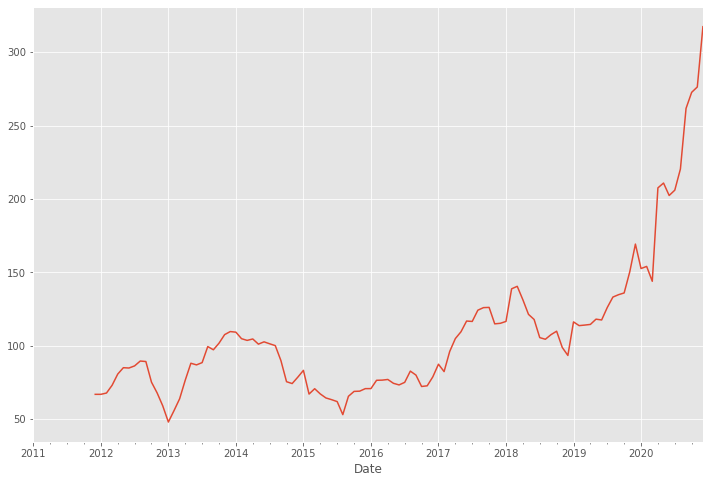

time: 427 ms


In [100]:
df_std.plot(figsize=(12, 8));

In [101]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  0.7554756296394473
p-value: 0.9908823822285939
Critical value (1%): -3.493
Critical value (5%): -2.889
Critical value (10%): -2.581
time: 17 ms


# make stationary

In [102]:
import numpy as np

df_log = np.log(df_settle)

time: 1.43 ms


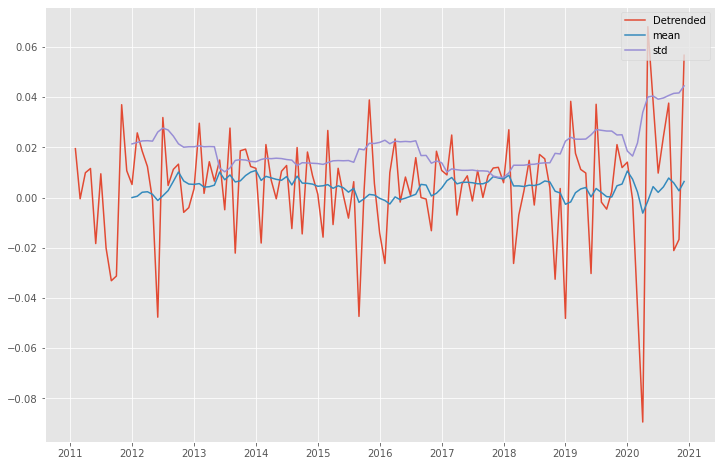

time: 284 ms


In [103]:
df_log_ma= df_log.rolling(2).mean()
df_detrend = df_log - df_log_ma
df_detrend.dropna(inplace=True)

# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [104]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -6.725072873002906
p-value: 0.00000
Critical value (1%): -3.489
Critical value (5%): -2.887
Critical value (10%): -2.580
time: 14.3 ms


In [105]:
# remove trend by differencing

time: 1.18 ms


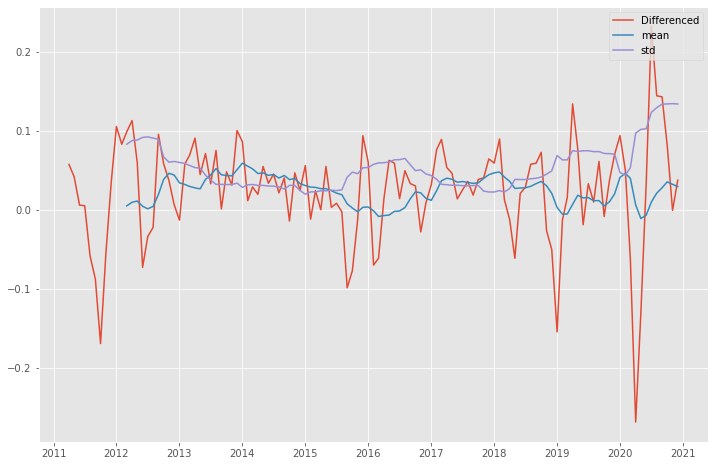

time: 397 ms


In [106]:
df_log_diff = df_log.diff(periods=3).dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [107]:
print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -6.725072873002906
p-value: 0.00000
Critical value (1%): -3.489
Critical value (5%): -2.887
Critical value (10%): -2.580
time: 3.38 ms


# seasonal decomp

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(df_log.dropna(), freq=12)

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

time: 6.43 ms


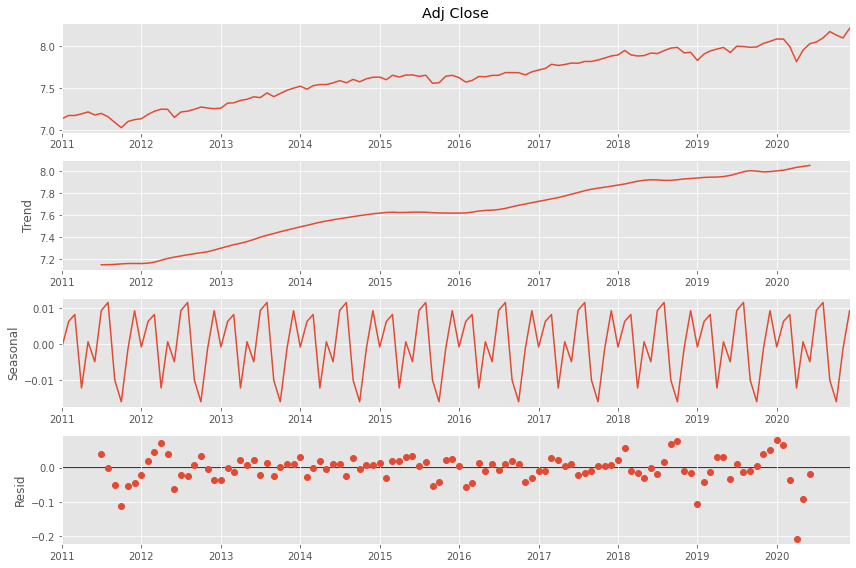

time: 1.05 s


In [109]:
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

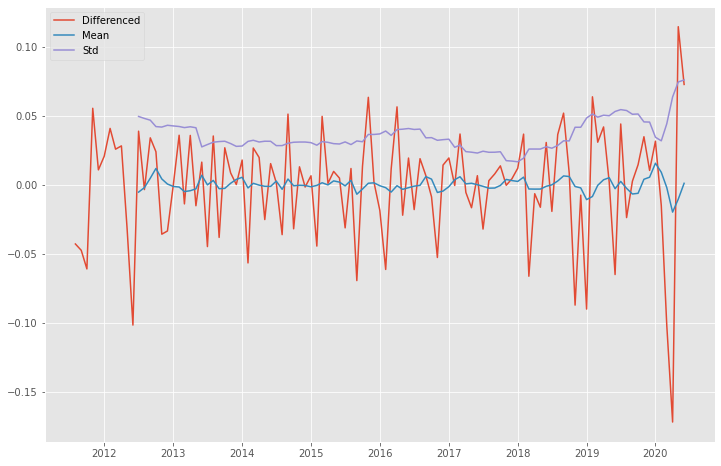

time: 412 ms


In [110]:
df_log_diff = df_residual.diff().dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [111]:
result = adfuller(df_residual.dropna())

print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -7.470362018341787
p-value: 0.00000
Critical value (1%): -3.495
Critical value (5%): -2.890
Critical value (10%): -2.582
time: 33.8 ms


# Forecasting and Predicting a Time Series

### finding model parameters by grid search

In [4]:
import itertools    
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    for order in param_combinations:    
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df_settle, order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs 

In [5]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12)

NameError: name 'df_settle' is not defined

In [114]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA(1, 1, 1)x(1, 1, 1, 12)
Lowest AIC: 1154.213
time: 2.18 ms


# fitting sarimax model

In [1]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)

NameError: name 'SARIMAX' is not defined

In [ ]:
print(model_results.summary())

In [3]:
model_results.plot_diagnostics(figsize=(12, 8));

NameError: name 'model_results' is not defined

In [ ]:
model_results.resid.describe()

# predicting the model

In [ ]:
n = len(df_settle.index)
prediction = model_results.get_prediction(
    start = n - 12*7, 
    end = n + 12
)
prediction_ci = prediction.conf_int()

In [ ]:
print(prediction_ci.tail(3))

In [ ]:
plt.figure(figsize=(12, 6))

ax = df_settle['2011':].plot(label='actual')
prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend();

In [ ]:
print(f'Today = {df_settle[-1]}')
print(f'Prediction =')
prediction_ci.tail(1)

In [ ]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
prediction_ci.plot_predict(, dynamic=True, ax=ax, plot_insample=False)